<a href="https://colab.research.google.com/github/ThanikPimpiban/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-means**

Generate Data

In [18]:
from sklearn.datasets import make_blobs

In [19]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2,random_state=6)

**Explore data**

In [20]:
X.shape

(500, 2)

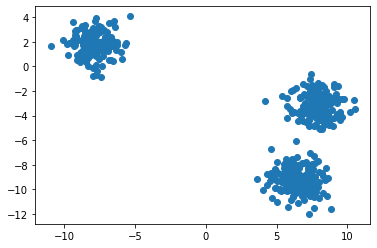

In [21]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

**Clustering**

**Import**

In [22]:
from sklearn.cluster import KMeans

**Define**

In [23]:
kmeans = KMeans(n_clusters=2, random_state=6)

**Fit-Predict**

In [24]:
y_clust = kmeans.fit_predict(X)

In [25]:
y_clust

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,

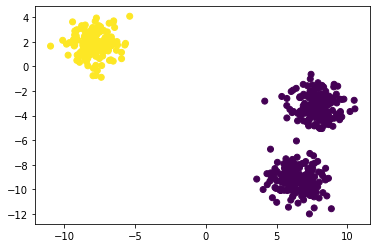

In [26]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

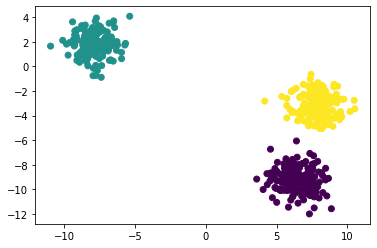

In [27]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

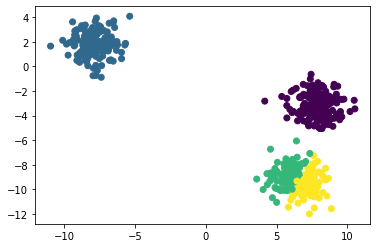

In [28]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

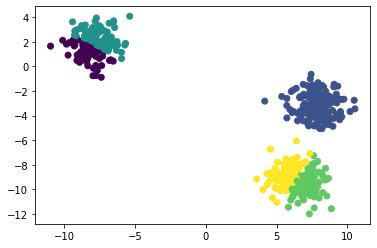

In [29]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

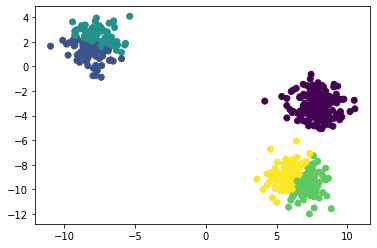

In [30]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

**Example Application (Color Quantization)**

In [31]:
import cv2
import os

In [32]:
img = cv2.imread('/content/frog-5.jpg')

In [33]:
img.shape

(426, 768, 3)

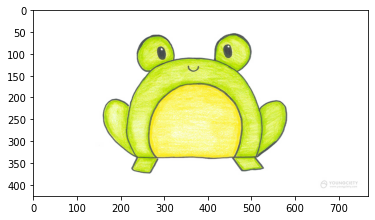

In [34]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

**นับจำนวนสี**

In [35]:
import numpy as np

In [36]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(31756, 3)

**จัดกลุ่มสีให้เหลือ 16 สี**

In [37]:
myquantize = KMeans(n_clusters=16,random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [38]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(327168, 3)

In [39]:
final_color = myquantize.fit_predict(img_row)

**ใช้ centroid เป็นตัวแทนของสี**

In [40]:
centroid = myquantize.cluster_centers_

In [41]:
centroid

array([[254.93986191, 254.94338697, 254.90930027],
       [217.99101468, 238.92855577,  80.21126452],
       [ 82.85520138,  90.7521621 ,  80.85025945],
       [225.75766871, 242.69891458, 107.04789995],
       [197.17891413, 231.49981781,  24.65407506],
       [246.25523545, 249.00439662, 153.09765128],
       [147.03231939, 169.33523447,  61.38973384],
       [249.59409762, 236.10170261,  44.38251986],
       [106.05220476, 118.03953371,  80.17257983],
       [208.3917754 , 235.4276561 ,  52.67520969],
       [250.44699211, 250.84122288, 189.43786982],
       [245.07254636, 246.88204432, 124.81953867],
       [174.18744474, 220.84332449,  13.25004421],
       [152.23467862, 156.33632287, 147.877429  ],
       [213.54297694, 215.06813417, 214.2851153 ],
       [249.99275564, 243.457927  ,  89.40930621]])

แทนสีคืนลงไป

In [42]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

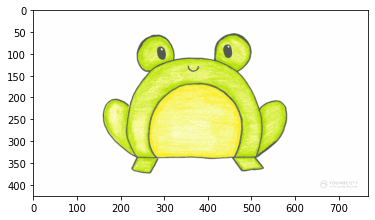

In [43]:
plt.imshow(new_img/255)

In [44]:
plt.imsave('img.jpg',new_img/255)

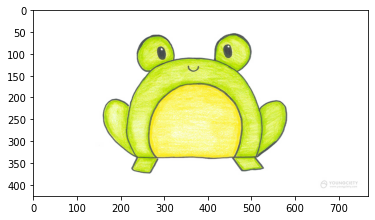

In [45]:
plt.imshow(RGB_img)

**Hierachical Clustering**

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

**Clustering Evaluation**

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation